## Analysis of Spike Train and Stimulus Relationship in Fish

- This notebook explores the relationship between a fish's neural spike train and external stimulus signals using data extracted from a `.mat` file. The goal is to visualize spike timing, estimate firing rates, and analyze stimulus-response patterns through signal processing techniques.

In [111]:
import numpy as np
import scipy.io #used to read .mat files (MATLAB format).
import matplotlib.pyplot as plt
from scipy.signal import correlate

In [112]:
file_path = "/Users/handanvural/Desktop/9/static_resources/2d8f13cba11848dd0b001694b81230d0_fish.mat"
data = scipy.io.loadmat(file_path)
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'rho', 'stim', 'time'])


In [113]:
time = data['time'].flatten() #turns multidimensional arrays into 1D arrays for simpler analysis.
rho = data['rho'].flatten() # rho: Neural spike train (usually binary).
stim = data['stim'].flatten()

**spike**, or action potential, is a very brief burst in which a neuron becomes electrically active and sends a signal.

In [114]:
total_spikes = np.sum(rho)
print(f'Total number of spikes: {total_spikes}')

Total number of spikes: 43408


In [115]:
total_time = time[-1] / 1000 #gives the last timestamp (in milliseconds). 
print(f'Duration of the experiment (seconds): {total_time}')

Duration of the experiment (seconds): 138.2395


### What Is a Stimulus?

- The word **stimulus (plural: stimuli)** means "stimulus." In biology and neuroscience, this is the external or internal influence that an organism receives through its sensory organs.

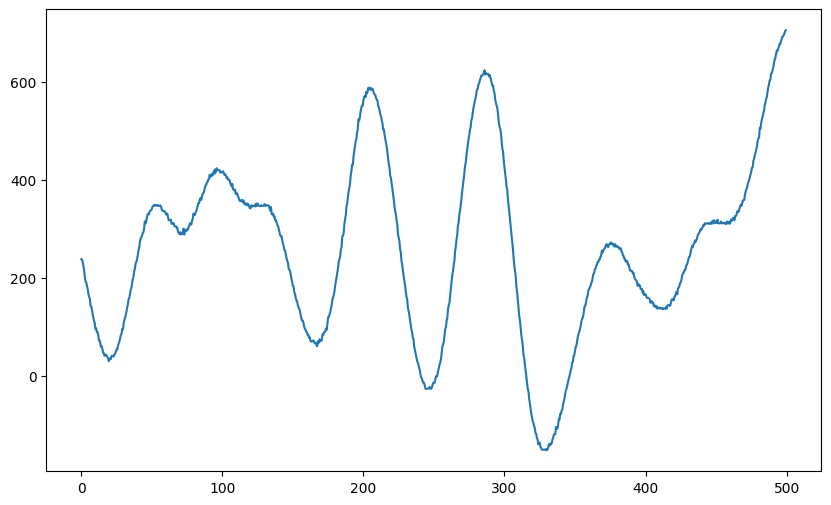

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(time[:1000], stim[:1000], label='Stimulus')


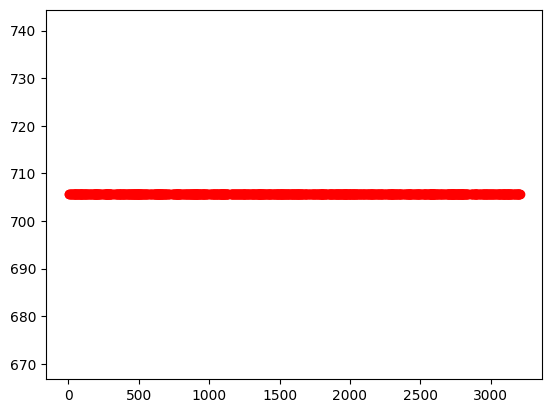

In [117]:
spike_times = time[rho == 1][:1000] # this filters out the spiked times and takes the first 1000 of those times (to keep the graph simple).
plt.scatter(spike_times, np.ones_like(spike_times) * max(stim[:1000]), color='r', label='Spikes')

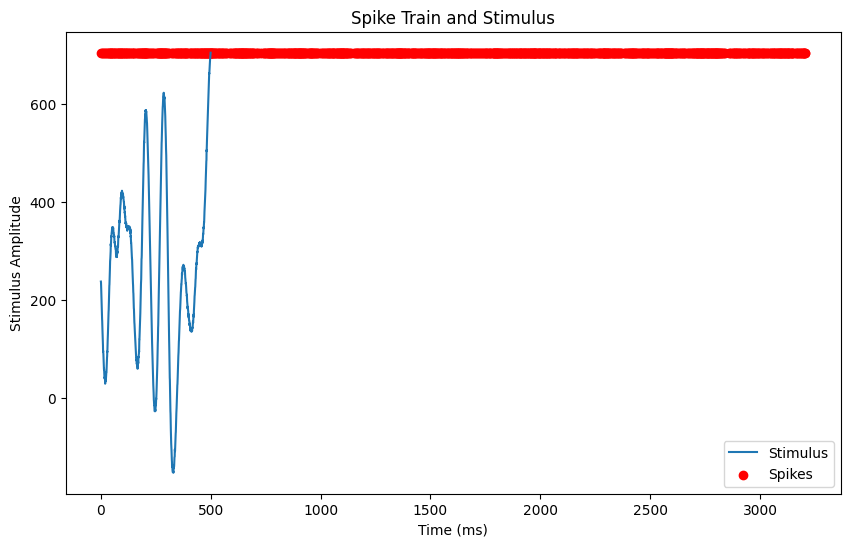

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(time[:1000], stim[:1000], label='Stimulus')

spike_times = time[rho == 1][:1000]
plt.scatter(spike_times, np.ones_like(spike_times) * max(stim[:1000]), color='r', label='Spikes')

plt.xlabel('Time (ms)')
plt.ylabel('Stimulus Amplitude')
plt.title('Spike Train and Stimulus')
plt.legend()
plt.show()

In [119]:
window_size = 101
prob = np.convolve(rho, np.ones(window_size)/window_size, mode='same')

### 🔄 Aligning Data Lengths and Computing Firing Rate

To ensure compatibility between arrays and to calculate a proper firing rate, we perform the following steps:

| Line                          | Purpose                                                      |
|------------------------------|--------------------------------------------------------------|
| `min_length = min(len(stim), len(prob))` | Align the lengths of `stim` and `prob`                        |
| `stim = stim[:min_length]`   | Truncate the `stimulus` array to the minimum length          |
| `prob = prob[:min_length]`   | Truncate the `spike probability` array to the same length     |
| `rate = prob * 1000 / window_size` | Convert the estimated spike probability into firing rate (Hz) |

- `prob` is the smoothed spike activity (via moving average).
- `window_size` is the length of the averaging filter in milliseconds.
- Multiplying by 1000 converts from milliseconds to seconds, giving **firing rate in Hz**.


In [120]:
min_length = min(len(stim), len(prob))
stim = stim[:min_length]
prob = prob[:min_length]

rate = prob * 1000 / window_size

If the fish (or test subject) tends to produce more spikes as the stimulus strength increases, this slope will be high.

In [121]:
coeffs = np.polyfit(stim, prob, 1)
a, b = coeffs
print(f'Lineer model: a={a}, b={b}')

Lineer model: a=0.00012564505260022457, b=0.12478689086542219


- It shows the **timing relationship between the stimulus and the spikes.** This allows us to understand how fast and strong the fish's response to the stimulus is + If the firing rate is high, the fish is sensitive to the stimulus and responds frequently.
A low firing rate indicates that the fish is less responsive to the stimulus or that the stimulus has no effect on the neurons.
We estimated the firing rate from the rho data with the moving average box filter and plotted these estimates. The firing rate is a measure of the firing rate of neurons over time. However, we used the rho data directly and analyzed it with a window function, namely the box filter.

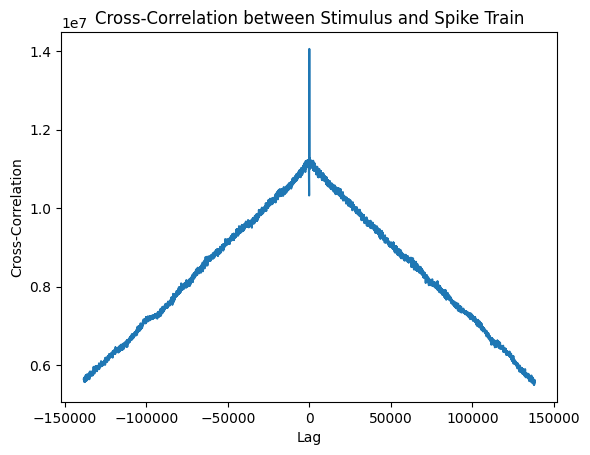

In [122]:
cross_corr = correlate(stim, rho[:len(stim)], mode='same', method='auto')
lags = np.arange(-len(stim)//2, len(stim)//2)

plt.plot(lags, cross_corr)
plt.title('Cross-Correlation between Stimulus and Spike Train')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.show()